In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from lib.data.RedDotsData import RedDotsData
from lib.data.RedDotsManualData import RedDotsManualData
from lib.data.RedDotsRawData import RedDotsRawData
from lib.FolderStructure import FolderStructure
from lib.data.DriftData import DriftData

#rootDir ="C:/workspaces/AnjutkaVideo/Kara_Sea_Crab_Video_st_5993_2018/"
#videoFileName = "V3__R_20180915_205551"
#videoFileName = "V4__R_20180915_210447"
#videoFileName = "V6__R_20180915_212238"


rootDir ="C:/workspaces/AnjutkaVideo/2019-Kara/St6279_19"
videoFileName = "V2"

#rootDir = "C:/workspaces/AnjutkaVideo/KaraSeaCrabVideoBlagopoluchiyaBay2018/"
#videoFileName = "V3_R_20180911_170159"
#videoFileName = "V2_R_20180911_165730"
#videoFileName = "V1_R_20180911_165259"

folderStruct = FolderStructure(rootDir, videoFileName)

drifts = DriftData.createFromFolderStruct(folderStruct)
maxFrameID = drifts.maxFrameID()
minFrameID = drifts.minFrameID()
#maxFrameID = 49
#minFrameID = 36281

redDotsManual = RedDotsManualData(folderStruct)
redDotsRaw = RedDotsRawData(folderStruct)

rdd = RedDotsData.createFromFolderStruct(folderStruct) #.getRedDotsFilepath())
rdd.getCount()

10419

In [18]:
redDotsManual.getCount()

402

In [39]:
redDotsRaw.getCount()

10845

In [3]:
dfToPlot = rdd.forPlotting()
dfToPlot.count()[0] #head(10)

7534

In [4]:
lowerFrameID = minFrameID
upperFrameID = maxFrameID
#lowerFrameID = 49
#upperFrameID = 36281

#lowerFrameID = 4000
#upperFrameID = 6000


zoomDF = dfToPlot.loc[dfToPlot['frameNumber'] > lowerFrameID].loc[dfToPlot['frameNumber'] < upperFrameID]

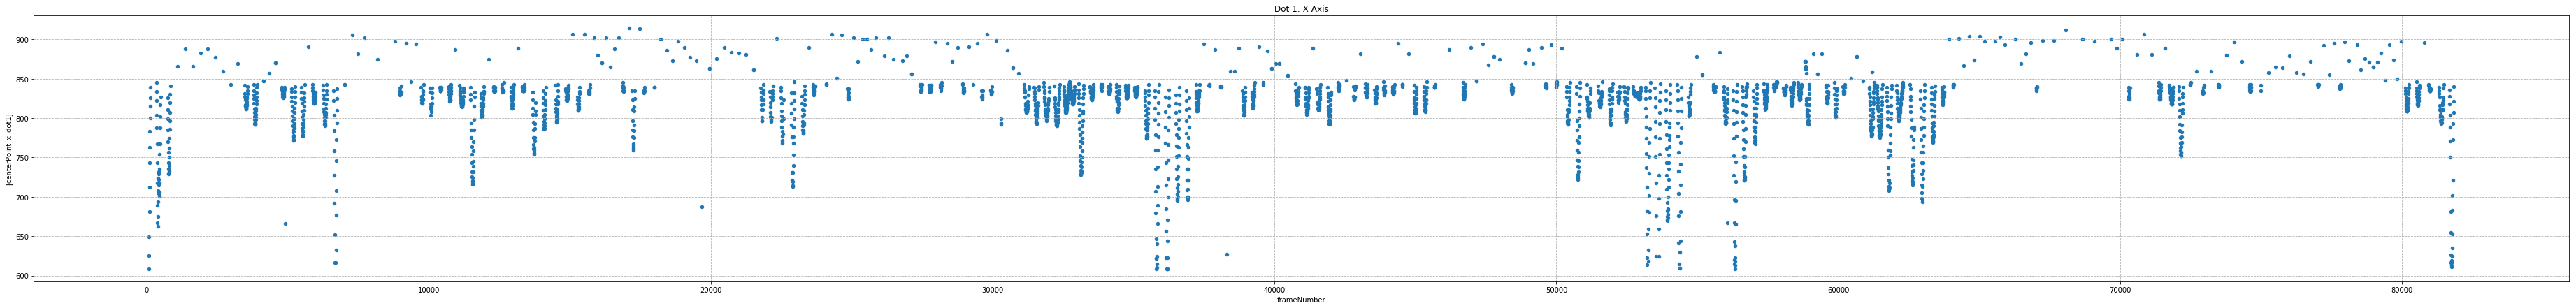

In [5]:
zoomDF.plot.scatter(x='frameNumber', y=['centerPoint_x_dot1'],figsize=(65,7), title="Dot 1: X Axis")
plt.gca().grid(which='major', axis='both', linestyle='--') #specify grid lines

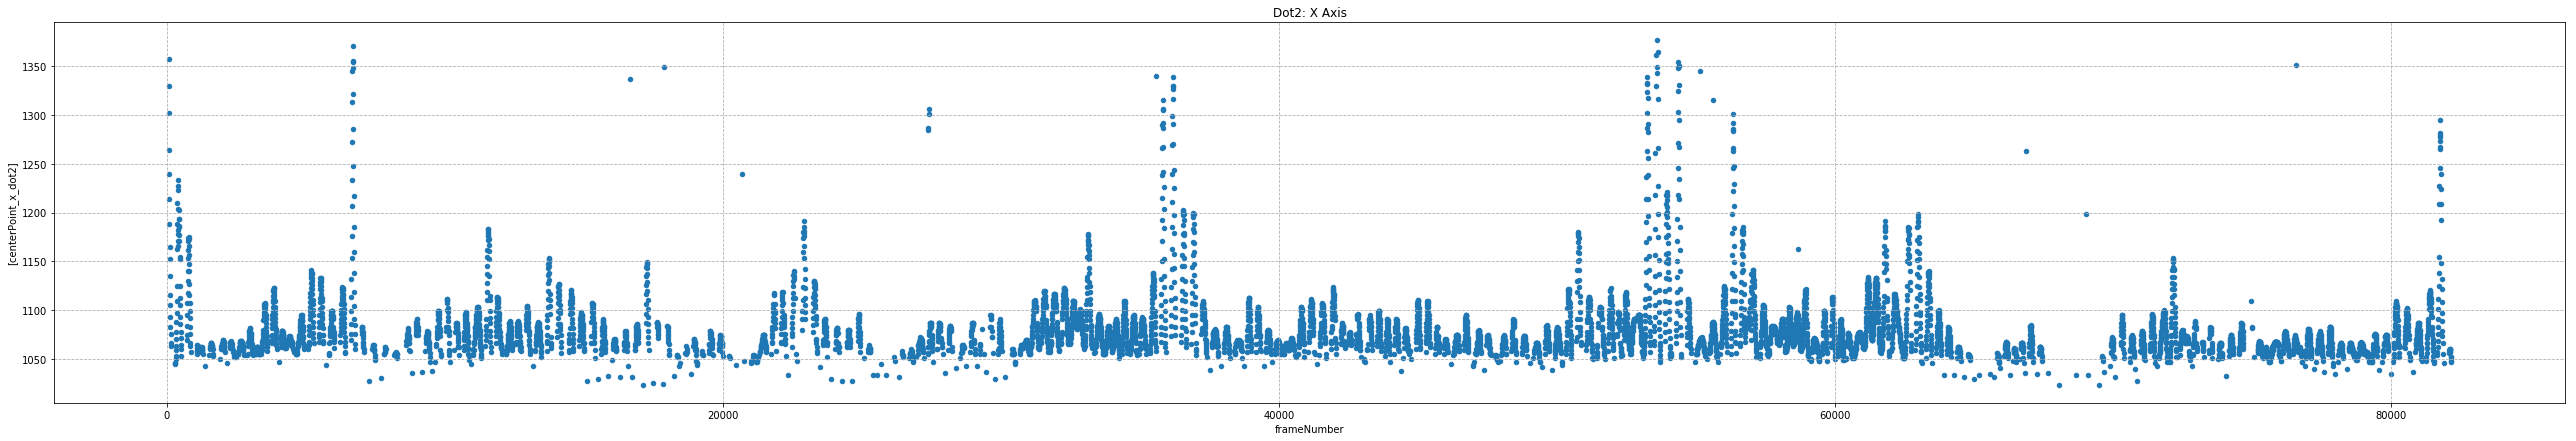

In [6]:
zoomDF.plot.scatter(x='frameNumber', y=['centerPoint_x_dot2'],figsize=(45,7), title="Dot2: X Axis")
plt.gca().grid(which='major', axis='both', linestyle='--') #specify grid lines

In [7]:
#df = rdd.interpolated(minFrameID, maxFrameID+1)
df = rdd.interpolatedDF()

#rdd.saveInterpolatedDFToFile(minFrameID, maxFrameID+1)
df.count()[0]
#df.head(10)

83381

In [15]:
#find dups
len(df[df.duplicated("frameNumber",keep=False)].index)


44

In [63]:
rawDF = redDotsRaw.getPandasDF()["frameNumber"]
rawDF

0           66
1           71
2           76
3           76
4           81
5           81
6           86
7           86
8           91
9           91
10          96
11          96
12         101
13         101
14         106
15         106
16         111
17         111
18         116
19         116
20         121
21         121
22         126
23         126
24         131
25         131
26         136
27         141
28         146
29         301
         ...  
10815    81801
10816    81801
10817    81806
10818    81806
10819    81811
10820    81811
10821    81816
10822    81816
10823    81821
10824    81821
10825    81826
10826    81831
10827    81831
10828    81836
10829    81841
10830    81851
10831    81876
10832    82076
10833    82086
10834    82091
10835    82096
10836    82101
10837    82106
10838    82111
10839    82116
10840    82121
10841    82136
10842    82141
10843    82151
10844    82156
Name: frameNumber, Length: 10845, dtype: int64

In [58]:
manualDF = redDotsManual.getPandasDF()["frameNumber"]
manualDF

0      68664
1      68664
2      65549
3      65549
4      26169
5      26169
6      78966
7      78966
8       1904
9       1904
10     20741
11     20741
12     75996
13     75996
14      7704
15      7704
16     18858
17     18858
18     47576
19     47576
20     67853
21     67853
22     69479
23     69479
24     64818
25     64818
26     66282
27     66282
28     25538
29     25538
       ...  
372    49458
373    49458
374    23489
375    23489
376    39749
377    39749
378    40034
379    40034
380    40319
381    40319
382    40604
383    40604
384    55789
385    55789
386    38443
387    38443
388    38725
389    38725
390     5741
391     5741
392    22353
393    22353
394    29798
395    29798
396    41359
397    41359
398    44389
399    44389
400    51344
401    51344
Name: frameNumber, Length: 402, dtype: int64

In [72]:

#newDF = redDotsRaw.getPandasDF()["frameNumber"].isin(redDotsManual.getPandasDF()["frameNumber"])


#newDF = redDotsRaw.getPandasDF()["frameNumber"].isin(manualDF)

#newDF[newDF == True]
#len(redDotsRaw.getPandasDF()[newDF == True].index)
#redDotsRaw.getPandasDF()[newDF == True]

newDF = rawDF.isin(manualDF)
rawDFWithoutRowsInManualDF = redDotsRaw.getPandasDF()[newDF == True]
rawDFWithoutRowsInManualDF
#newDF

,frameNumber,dotName,centerPoint_x,centerPoint_y,topLeft_x,topLeft_y,bottomRight_x,bottomRight_y,diagonal
472,4131,redDot2,1078,563,1065,549,1091,578,38.948684
508,4351,redDot2,1067,571,1055,557,1080,585,37.536649
543,4571,redDot2,1060,584,1050,574,1071,594,29.000000
915,7016,redDot2,1081,565,1067,549,1095,581,42.520583
1039,9371,redDot2,1079,563,1065,549,1093,578,40.311289
1994,16151,redDot2,1059,584,1047,573,1071,596,33.241540
2246,19961,redDot2,1063,581,1054,572,1073,591,26.870058
2299,21521,redDot2,1066,578,1056,568,1077,588,29.000000
2650,24481,redDot2,1073,571,1062,558,1085,585,35.468296
2747,27116,redDot2,1069,569,1057,558,1082,580,33.301652


c:\old\python27\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


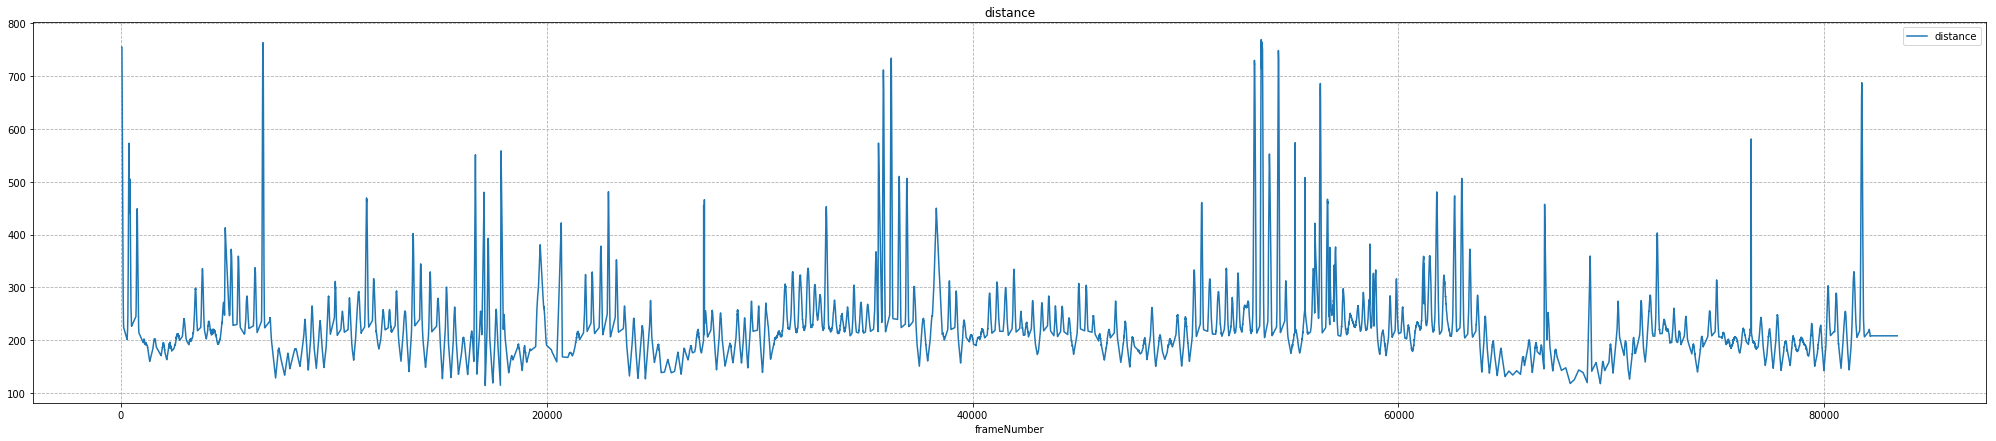

In [8]:
df.plot(x='frameNumber', y=['distance'],figsize=(35,7), title="distance")
plt.gca().grid(which='major', axis='both', linestyle='--') #specify grid lines

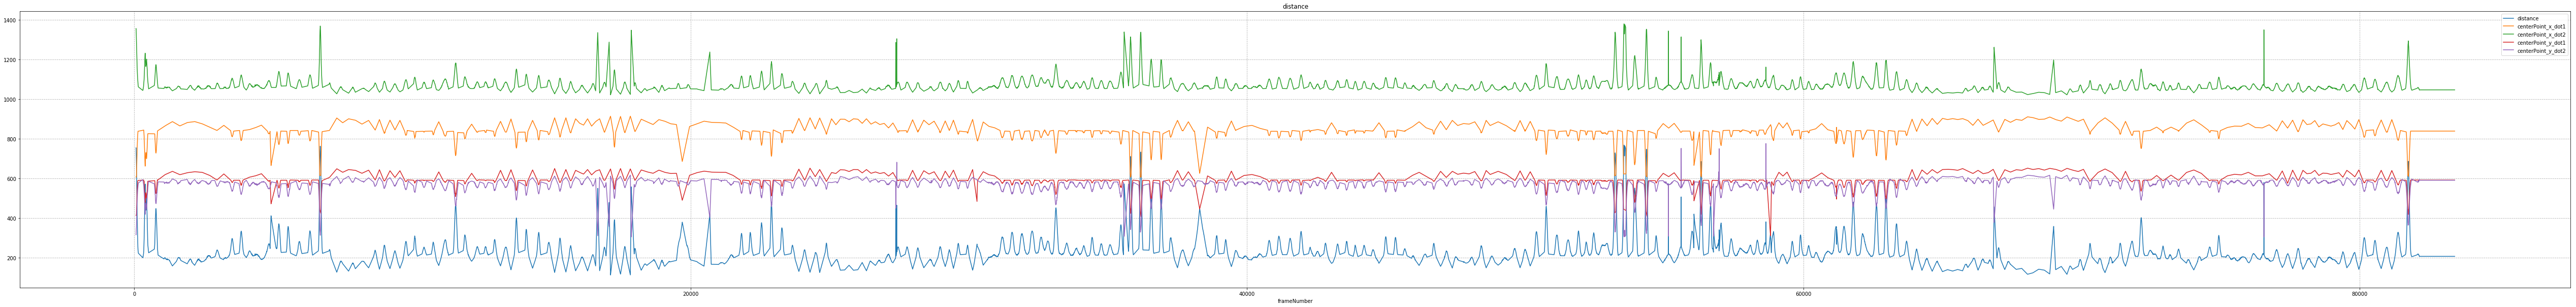

In [9]:
df.plot(x='frameNumber', y=['distance','centerPoint_x_dot1', 'centerPoint_x_dot2','centerPoint_y_dot1', 'centerPoint_y_dot2'],figsize=(90,10), title="distance")
plt.gca().grid(which='major', axis='both', linestyle='--') #specify grid lines

In [10]:
dataRedDot2 = rdd.onlyRedDot2()
dataRedDot2.count()[0]

AttributeError: RedDotsData instance has no attribute 'onlyRedDot2'

In [ ]:
#dataRedDot2 = replaceOutlierBetweenTwo(dataRedDot2, 'centerPoint_x')
dataRedDot1 = rdd.onlyRedDot1()
dataRedDot1.count()[0]
#dataRedDot1['frameNumber']


In [ ]:
dataRedDot1.plot(x='frameNumber', y=['centerPoint_x'],figsize=(15,7), title="redDot1: X Axis")
plt.gca().grid(which='major', axis='both', linestyle='--') #specify grid lines

In [ ]:
dataRedDot1.plot(x='frameNumber', y=['centerPoint_y'],figsize=(15,7), title="redDot1 Y Axis")
plt.gca().grid(which='major', axis='both', linestyle='--') #specify grid lines

In [ ]:
dataRedDot2.plot(x='frameNumber', y=['centerPoint_x'],figsize=(15,7), title="dataRedDot2 X Axis")
plt.gca().grid(which='major', axis='both', linestyle='--') #specify grid lines

In [ ]:
dataRedDot2.plot(x='frameNumber', y=['centerPoint_y'],figsize=(15,7), title="dataRedDot2 Y Axis")
plt.gca().grid(which='major', axis='both', linestyle='--') #specify grid lines

In [ ]:
dfToPlot.plot(x='frameNumber', y=['centerPoint_x_dot1','centerPoint_x_dot2'],figsize=(15,7), title="X Axis")
plt.gca().grid(which='major', axis='both', linestyle='--') #specify grid lines

In [ ]:
dfToPlot.plot(x='frameNumber', y=['centerPoint_y_dot1','centerPoint_y_dot2'],figsize=(15,7), title="Y Axis")
plt.gca().grid(which='major', axis='both', linestyle='--') #specify grid lines